In [3]:
from tensorflow.keras.datasets import mnist

(train_images, y_train), (test_images, y_test) = mnist.load_data()
x_train = train_images.reshape(60000,28,28,1) / 255
x_test = test_images.reshape(10000, 28, 28, 1) / 255

In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary(line_length=80)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                 │ (None, 26, 26, 32)       │           320 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)    │ (None, 13, 13, 32)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)                 │ (None, 11, 11, 64)       │        18,496 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)    │ (None, 5, 5, 64)         │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ flatten_2 (Flatten)               │ (None, 1600)             │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_4 (Dense)                   │ (None, 128)              │       204,928 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_5 (Dense)                   │ (None, 10)               │         1,290 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                 epochs=10, batch_size=50)
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8987 - loss: 0.3404 - val_accuracy: 0.9824 - val_loss: 0.0519
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9853 - loss: 0.0461 - val_accuracy: 0.9877 - val_loss: 0.0339
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9907 - loss: 0.0311 - val_accuracy: 0.9907 - val_loss: 0.0296
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9928 - loss: 0.0221 - val_accuracy: 0.9907 - val_loss: 0.0277
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9951 - loss: 0.0137 - val_accuracy: 0.9898 - val_loss: 0.0296
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9962 - loss: 0.0122 - val_accuracy: 0.9917 - val_loss: 0.0265
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9969 - loss: 0.0090 - val_accuracy: 0.9925 - val_loss: 0.0234
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9980 - loss: 0.0066 - 

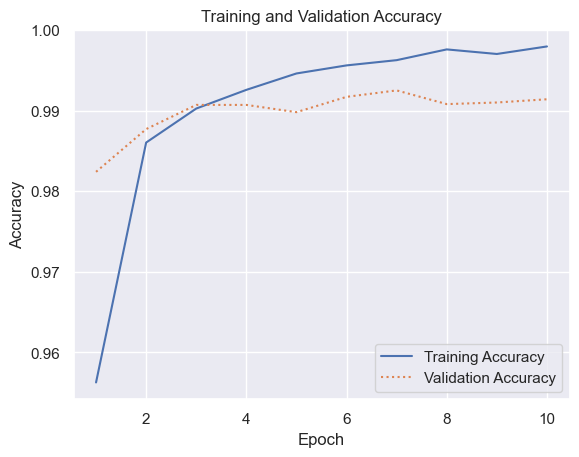

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')